### Restaurant Billing Data

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [5]:
party_counts = pd.crosstab(tips['day'],tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


 size 2 (two people) is more 

In [6]:
# Not many 1 and 6 person parties
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [7]:
party_counts.sum(1)

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

In [8]:
# Normalize to sum to 1
party_pct  = party_counts.div(party_counts.sum(1), axis = 0)
party_pct

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


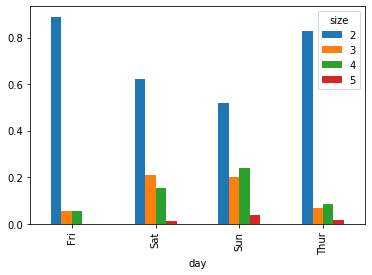

In [9]:
party_pct.plot.bar()

In [10]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

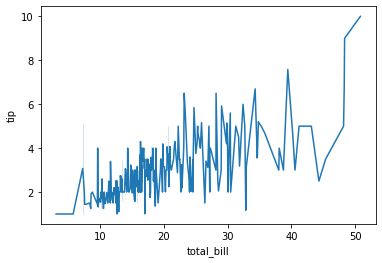

In [11]:
sns.lineplot(x='total_bill',y='tip',data=tips)

People who pay more bill gives more tip

In [12]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


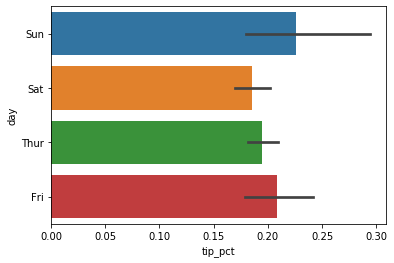

In [13]:
sns.barplot(x='tip_pct', y='day', data=tips,  orient = 'h')

Tips % is more on sunday

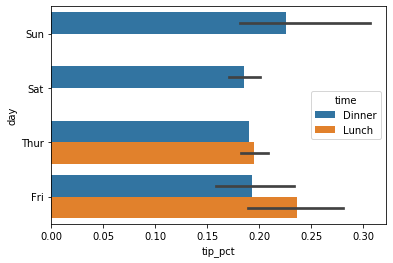

In [14]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient = 'h')

Lunch time tip % is more

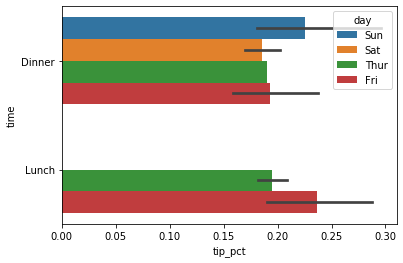

In [15]:
sns.barplot(x='tip_pct', y='time', hue='day', data=tips, orient = 'h')

People have lunch on Thrsday and Friday and dinner on other days

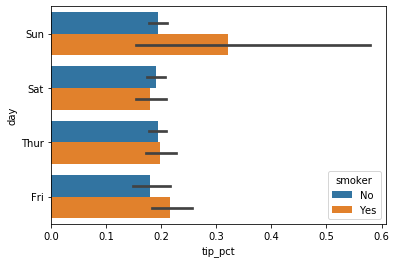

In [16]:
sns.barplot(x='tip_pct', y='day', hue='smoker', data=tips, orient = 'h')

People who smoke gives more tips on sunday

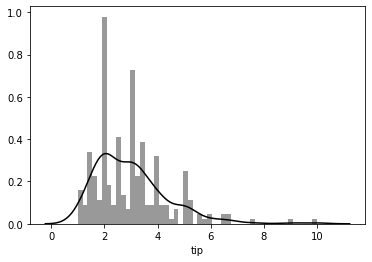

In [17]:
sns.distplot(tips['tip'], bins = 50, color = 'k')

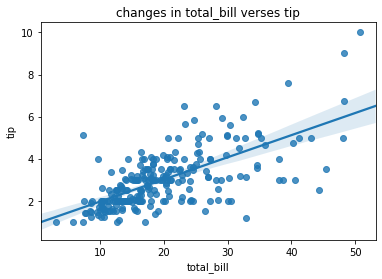

In [18]:
sns.regplot('total_bill', 'tip', data = tips)
plt.title('changes in total_bill verses tip')
plt.show()

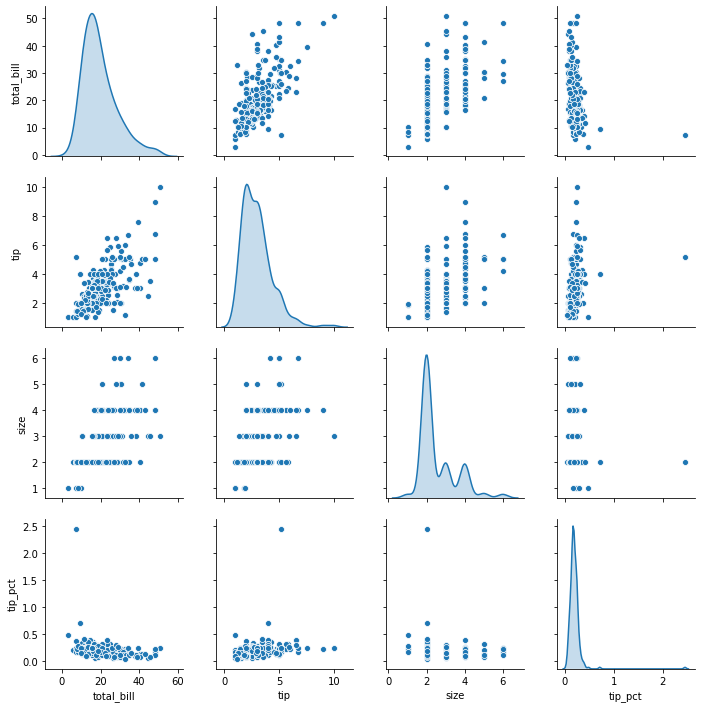

In [19]:
# To check relationship between all variables in data
sns.pairplot(tips, diag_kind = 'kde')

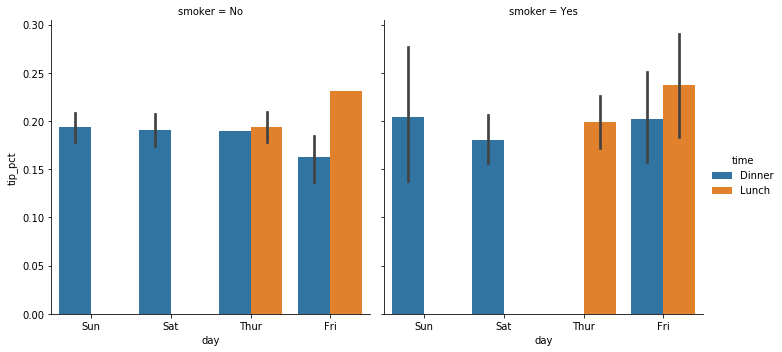

In [20]:
sns.factorplot(x = 'day', y = 'tip_pct', hue = 'time', col = 'smoker', kind = 'bar', data = tips[tips.tip_pct < 1])

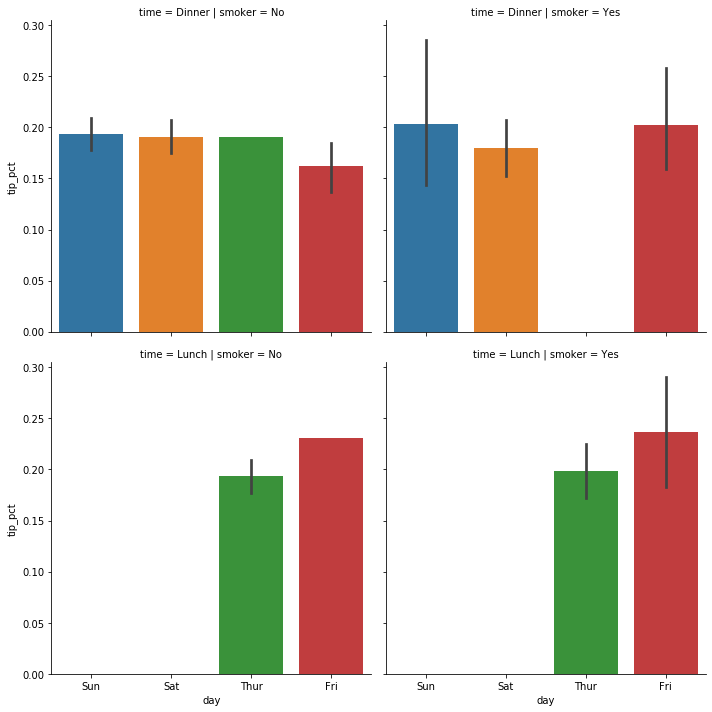

In [21]:
sns.factorplot(x = 'day', y = 'tip_pct', row = 'time', col = 'smoker', kind = 'bar', data = tips[tips.tip_pct < 1])

 people who smoke mostly visit the restaurant at dinner time on sunday saturday and friday